In [1]:
import os
import sys
import platform
import random

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from tensorflow import keras

In [2]:
img_size = (56, 56, 3)
check = True

In [3]:
def load_path(img_dir):
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2)
    ext = ['.JPG', '.jpg', '.png', 'PNG']
    img_paths = []
    labels = []

    for (path, dir, files) in os.walk(img_dir):
        if 'scissor' in path.split(slashs):
            for filename in files:
                if os.path.splitext(filename)[-1] in ext:
                    img_paths.append(os.path.join(path, filename))
                    labels.append(0)
        elif 'rock' in path.split(slashs):
            for filename in files:
                if os.path.splitext(filename)[-1] in ext:
                    img_paths.append(os.path.join(path, filename))
                    labels.append(1)
        elif 'paper' in path.split(slashs):
            for filename in files:
                if os.path.splitext(filename)[-1] in ext:
                    img_paths.append(os.path.join(path, filename))
                    labels.append(2)
    print("이미지 개수는 {}입니다.".format(len(img_paths)))
    if len(img_paths) == 0:
        print("이미지가 없습니다!")
        sys.exit()
    return img_paths, np.array(labels, dtype=np.int32)

In [4]:
def load_imgs(img_paths, norm=True):
    rgb_weights = [0.2989, 0.5870, 0.1140]
    imgs=np.zeros(len(img_paths)*img_size[0]*img_size[1]*img_size[2],dtype=np.int32).reshape(len(img_paths),img_size[0],img_size[1],img_size[2])

    for i, img_path in enumerate(img_paths):
        img = np.array(Image.open(img_path).resize(img_size[:2], Image.ANTIALIAS), dtype=np.int32)
        if(img_size[2] == 1):
            imgs[i,:,:,:] = np.dot(img, rgb_weights).reshape(img_size[0], img_size[1], -1)
        else:
            imgs[i,:,:,:] = img
    print("data range {} ~ {}".format(np.min(imgs), np.max(imgs)))

    if norm:
        imgs = imgs/255.0
        print("-> data range {} ~ {}".format(np.min(imgs), np.max(imgs)))
    return imgs

In [5]:
#Jupyter
#local_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
local_path = os.getcwd()
slashs = '\\' if platform.system() == 'Windows' else '/'

In [6]:
trees = [os.path.join(local_path, 'data')\
, os.path.join(local_path, 'data', 'train'), os.path.join(local_path, 'data', 'test')\
, os.path.join(local_path, 'data', 'train', 'paper'), os.path.join(local_path, 'data', 'train', 'rock'), os.path.join(local_path, 'data', 'train', 'scissor')\
, os.path.join(local_path, 'data', 'test', 'paper'), os.path.join(local_path, 'data', 'test', 'rock'), os.path.join(local_path, 'data', 'test', 'scissor')]


In [7]:
tree_result = []
tree_result = list([ True  if  os.path.isdir(i) else False for i in trees])
for i, _bool in enumerate(tree_result):
    if _bool == False:
        print("{}가 경로에 없습니다! 다시 만들어주세요.".format(trees[i]))
        sys.exit()

In [8]:
######################################## trainset 로드
img_path = os.path.join(local_path, 'data', 'train')
train_img_paths, y_train = load_path(img_path)
x_train = load_imgs(train_img_paths, norm=True)

이미지 개수는 5627입니다.
data range 0 ~ 255
-> data range 0.0 ~ 1.0


라벨: 보


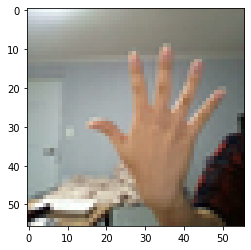

In [9]:
######################################## trainset 확인
if check:
    ran_idx = random.randrange(0, len(x_train))
    if(img_size[2] == 1):
        plt.imshow(x_train[ran_idx], cmap='gray')        
    else:
        plt.imshow(x_train[ran_idx])
    print('라벨: {}'.format('가위' if y_train[ran_idx] == 0 else '바위' if y_train[ran_idx] == 1 else '보'))
    if slashs == "\\":
        plt.show()

In [10]:
######################################## testset 로드
img_path = os.path.join(local_path, 'data', 'test')
test_img_paths, y_test = load_path(img_path)
x_test = load_imgs(test_img_paths, norm=True)

이미지 개수는 300입니다.
data range 13 ~ 254
-> data range 0.050980392156862744 ~ 0.996078431372549


라벨: 바위


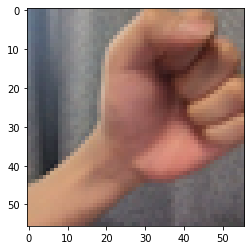

In [11]:
######################################## testset 확인
if check:
    ran_idx = random.randrange(0, len(x_test))
    if(img_size[2] == 1):
        plt.imshow(x_test[ran_idx], cmap='gray')        
    else:
        plt.imshow(x_test[ran_idx])
    print('라벨: {}'.format('가위' if y_test[ran_idx] == 0 else '바위' if y_test[ran_idx] == 1 else '보'))
    if slashs == "\\":
        plt.show()

In [12]:
######################################## model 생성
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_size[0],img_size[1],img_size[2])))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [13]:
######################################## data shuffle
idx = np.arange(len(x_train))
np.random.shuffle(idx)
x_train = x_train[idx]
y_train = y_train[idx]

In [14]:
######################################## model training
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
176/176 [==============================] - 27s 5ms/step - loss: 0.8116 - accuracy: 0.6055
Epoch 2/6
176/176 [==============================] - 1s 4ms/step - loss: 0.3234 - accuracy: 0.8726
Epoch 3/6
176/176 [==============================] - 1s 4ms/step - loss: 0.1427 - accuracy: 0.9479
Epoch 4/6
176/176 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9725
Epoch 5/6
176/176 [==============================] - 1s 4ms/step - loss: 0.0356 - accuracy: 0.9881
Epoch 6/6
176/176 [==============================] - 1s 4ms/step - loss: 0.0495 - accuracy: 0.9840


In [15]:
######################################## model test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4123 - accuracy: 0.7300
test_loss: 1.4122921228408813 
test_accuracy: 0.7300000190734863
